In [1]:
!pip install pandas-profiling==2.7.1

# Đề thi giữa kỳ môn LDS6: Machine Learning With Python



## **Câu 1:** 
### Cung cấp bộ dữ liệu Ecoli **ecoli.csv** trong folder đề thi (thông tin chi tiết và dữ liệu cũng có thể download trên https://www.openml.org/d/1011) với 8 features và bảng kết quả run (https://www.openml.org/t/3874) đã được thực hiện để tham khảo.
## Yêu cầu:
### Hãy chọn thuật toán phù hợp để xây dựng model dự đoán một mẫu có **binaryClass** là positive(“P”) hay negative (“N”). Giải thích lý do tại sao bạn chọn thuật toán này?
#### Chú ý: Thực hiện tất cả các bước để giải quyết vấn đề này từ tiền xử lý dữ liệu => báo cáo kết quả.


In [2]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

%cd '/content/gdrive/MyDrive/LDS6_S7CN_KieuTriDang/LDS6_KieuTriDang_GiuaKy'

Mounted at /content/gdrive/
/content/gdrive/MyDrive/LDS6_S7CN_KieuTriDang/LDS6_KieuTriDang_GiuaKy


In [3]:
import pandas as pd

df = pd.read_csv("ecoli.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mcg          336 non-null    float64
 1   gvh          336 non-null    float64
 2   lip          336 non-null    float64
 3   chg          336 non-null    float64
 4   aac          336 non-null    float64
 5   alm1         336 non-null    float64
 6   alm2         336 non-null    float64
 7   binaryClass  336 non-null    object 
dtypes: float64(7), object(1)
memory usage: 21.1+ KB


In [4]:
df.head()

,mcg,gvh,lip,chg,aac,alm1,alm2,binaryClass
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,P
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,P
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,P
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,P
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,P


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import datetime
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,AdaBoostClassifier

y = df['binaryClass']
X = df.drop('binaryClass',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

models = [
    SVC(kernel='rbf', C=100, gamma=0.1),
    LogisticRegression(),
    RandomForestClassifier(n_estimators=100),
    DecisionTreeClassifier(),
    KNeighborsClassifier(n_neighbors=5),
    AdaBoostClassifier(n_estimators=100, base_estimator=RandomForestClassifier(), learning_rate=1),
]
CV = 10
entries = []
i=0
for model in models:
    scores_train = []
    scores_test = []
    times = []
    abs_scores = []
    for j in range(CV):
        t1 = datetime.datetime.now()
        model_name = model.__class__.__name__
        model.fit(X_train,y_train)
        t2 = datetime.datetime.now()    
        d = round((t2 - t1).microseconds/1000,1) # => miliseconds
        score_train = model.score(X_train,y_train)
        score_test = model.score(X_test,y_test)
        abs_score = abs(score_train - score_test)          
        
        scores_train.append(score_train)          
        scores_test.append(score_test)
        abs_scores.append(abs_score)
        times.append(d) 
    entries.append([model_name, np.array(scores_train).mean(), 
                    np.array(scores_test).mean(), np.array(abs_scores).mean(), 
                    np.array(times).mean()])
    i += 1
cv_df = pd.DataFrame(entries, 
                     columns=['model_name', 'score_train_mean', 
                              'score_test_mean', 'abs|score|', 'time_mean'])
cv_df

,model_name,score_train_mean,score_test_mean,abs|score|,time_mean
0,SVC,0.974468,0.940594,0.033874,2.19
1,LogisticRegression,0.953191,0.940594,0.012597,6.87
2,RandomForestClassifier,1.000000,0.946535,0.053465,150.16
3,DecisionTreeClassifier,1.000000,0.910891,0.089109,1.31
4,KNeighborsClassifier,0.974468,0.970297,0.004171,1.33
5,AdaBoostClassifier,1.000000,0.946535,0.053465,155.81


## Nhận xét:
1. Chạy lần đầu thấy model Decision Tree là hiệu quả nhất (time ngắn độ chính xác cao)
1. Mục tiêu bây giờ sẽ tối ưu hóa mô hình Decision Tree bằng phương pháp xử lý dữ liệu lại.

In [6]:
# Kiểm tra dữ liệu có null hay không?
print(df.isnull().sum())
# không có dữ liệu null

mcg            0
gvh            0
lip            0
chg            0
aac            0
alm1           0
alm2           0
binaryClass    0
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

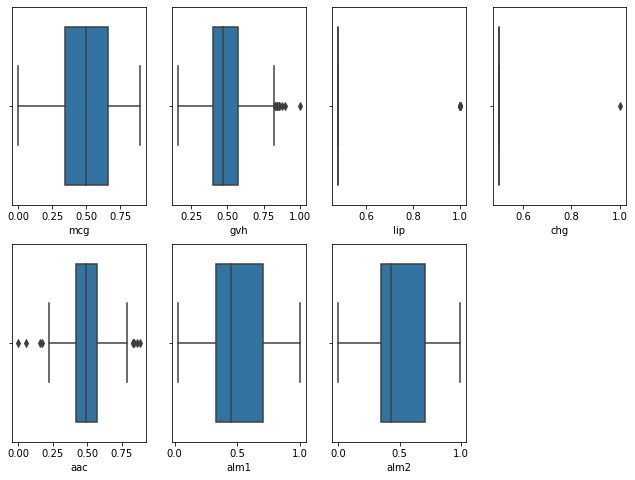

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Trực quan hóa dữ liệu cho từng biến liên tục
plt.figure(figsize = (11, 8))
plt.subplot(2, 4, 1)
sns.boxplot(df.mcg, orient='v')
plt.subplot(2, 4, 2,)
sns.boxplot(df.gvh, orient='v')
plt.subplot(2, 4, 3,)
sns.boxplot(df.lip, orient='v')
plt.subplot(2, 4, 4,)
sns.boxplot(df.chg, orient='v')
plt.subplot(2, 4, 5,)
sns.boxplot(df.aac, orient='v')
plt.subplot(2, 4, 6,)
sns.boxplot(df.alm1, orient='v')
plt.subplot(2, 4, 7,)
sns.boxplot(df.alm2, orient='v')
plt.show()

* Có outlier ở một số feature như: gvh và aac
* Có khả năng lip và chg

In [8]:
df = df[df['gvh']<0.787]
df = df[df['aac']<0.77]
df = df[df['aac']>0.21]

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import datetime
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,AdaBoostClassifier

y = df['binaryClass']
X = df.drop('binaryClass',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

models = [
    SVC(kernel='rbf', C=100, gamma=0.1),
    LogisticRegression(),
    RandomForestClassifier(n_estimators=100),
    DecisionTreeClassifier(),
    KNeighborsClassifier(n_neighbors=5),
    AdaBoostClassifier(n_estimators=100, base_estimator=RandomForestClassifier(), learning_rate=1),
]
CV = 10
entries = []
i=0
for model in models:
    scores_train = []
    scores_test = []
    times = []
    abs_scores = []
    for j in range(CV):
        t1 = datetime.datetime.now()
        model_name = model.__class__.__name__
        model.fit(X_train,y_train)
        t2 = datetime.datetime.now()    
        d = round((t2 - t1).microseconds/1000,1) # => miliseconds
        score_train = model.score(X_train,y_train)
        score_test = model.score(X_test,y_test)
        abs_score = abs(score_train - score_test)          
        
        scores_train.append(score_train)          
        scores_test.append(score_test)
        abs_scores.append(abs_score)
        times.append(d) 
    entries.append([model_name, np.array(scores_train).mean(), 
                    np.array(scores_test).mean(), np.array(abs_scores).mean(), 
                    np.array(times).mean()])
    i += 1
cv_df = pd.DataFrame(entries, 
                     columns=['model_name', 'score_train_mean', 
                              'score_test_mean', 'abs|score|', 'time_mean'])
cv_df

,model_name,score_train_mean,score_test_mean,abs|score|,time_mean
0,SVC,0.971698,0.945652,0.026046,1.59
1,LogisticRegression,0.957547,0.934783,0.022765,5.83
2,RandomForestClassifier,1.000000,0.965217,0.034783,143.95
3,DecisionTreeClassifier,1.000000,0.906522,0.093478,1.24
4,KNeighborsClassifier,0.971698,0.978261,0.006563,1.41
5,AdaBoostClassifier,1.000000,0.967391,0.032609,148.50


### Sau khi loại bỏ một số dữ liệu được cho là outlier thì kết quả training giảm
=> Không loại bỏ outlier

=> Sử dụng mô hình Decision Tree

## **Câu 2:**
### Cung cấp bộ dữ liệu Cholesterol **dataset_2190_cholesterol.csv** trong folder đề thi (thông tin chi tiết và dữ liệu cũng có thể download trên https://www.openml.org/d/204 ) với 14 features và bảng kết quả run (https://www.openml.org/t/2295 ) đo bằng MAE đã được thực hiện để tham khảo.
## Yêu cầu:
### Hãy chọn thuật toán phù hợp để xây dựng model dự đoán **chol** (chỉ số choleserol). Giải thích lý do tại sao bạn chọn thuật toán này?
#### Chú ý: Thực hiện tất cả các bước để giải quyết vấn đề này từ tiền xử lý dữ liệu => báo cáo kết quả.


In [44]:
df2 = pd.read_csv('dataset_2190_cholesterol.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    object 
 11  thal      303 non-null    object 
 12  num       303 non-null    int64  
 13  chol      303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [45]:
df2.head()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


In [43]:
import pandas_profiling as pp

profile = pp.ProfileReport(df2)
profile

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
df2.corr()

In [49]:
df2 = df2[df2['ca'] != '?']
df2.ca = df2.ca.astype(str).astype(int)

In [50]:
df2 = df2[df2['thal'] != '?']
df2.thal = df2.thal.astype(str).astype(int)

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   fbs       297 non-null    int64  
 5   restecg   297 non-null    int64  
 6   thalach   297 non-null    int64  
 7   exang     297 non-null    int64  
 8   oldpeak   297 non-null    float64
 9   slope     297 non-null    int64  
 10  ca        297 non-null    int64  
 11  thal      297 non-null    int64  
 12  num       297 non-null    int64  
 13  chol      297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.8 KB


In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import datetime
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,AdaBoostRegressor

y = df2['chol']
X = df2.drop('chol',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

models = [
    SVR(kernel='rbf', C=100, gamma=0.1),
    LinearRegression(),
    RandomForestRegressor(n_estimators=100),
    DecisionTreeRegressor(),
    KNeighborsRegressor(n_neighbors=5),
    AdaBoostRegressor(n_estimators=100, base_estimator=RandomForestRegressor(), learning_rate=1),
]
CV = 10
entries = []
i=0
for model in models:
    scores_train = []
    scores_test = []
    times = []
    abs_scores = []
    for j in range(CV):
        t1 = datetime.datetime.now()
        model_name = model.__class__.__name__
        model.fit(X_train,y_train)
        t2 = datetime.datetime.now()    
        d = round((t2 - t1).microseconds/1000,1) # => miliseconds
        score_train = model.score(X_train,y_train)
        score_test = model.score(X_test,y_test)
        abs_score = abs(score_train - score_test)          
        
        scores_train.append(score_train)          
        scores_test.append(score_test)
        abs_scores.append(abs_score)
        times.append(d) 
    entries.append([model_name, np.array(scores_train).mean(), 
                    np.array(scores_test).mean(), np.array(abs_scores).mean(), 
                    np.array(times).mean()])
    i += 1
cv_df = pd.DataFrame(entries, 
                     columns=['model_name', 'score_train_mean', 
                              'score_test_mean', 'abs|score|', 'time_mean'])
cv_df

,model_name,score_train_mean,score_test_mean,abs|score|,time_mean
0,SVR,0.982037,-0.039288,1.021325,9.52
1,LinearRegression,0.172724,-0.071913,0.244637,1.28
2,RandomForestRegressor,0.867825,-0.192534,1.060359,188.13
3,DecisionTreeRegressor,1.000000,-0.852396,1.852396,1.94
4,KNeighborsRegressor,0.262726,-0.161638,0.424364,1.20
5,AdaBoostRegressor,0.929425,-0.167166,1.096592,426.15


## Nhận xét:
Sau khi chạy một loạt training model thì toàn bộ bị over-fitting

Dữ liệu cần được xử lý lại

In [18]:
df2.columns

Index(['age', 'sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'num', 'chol'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

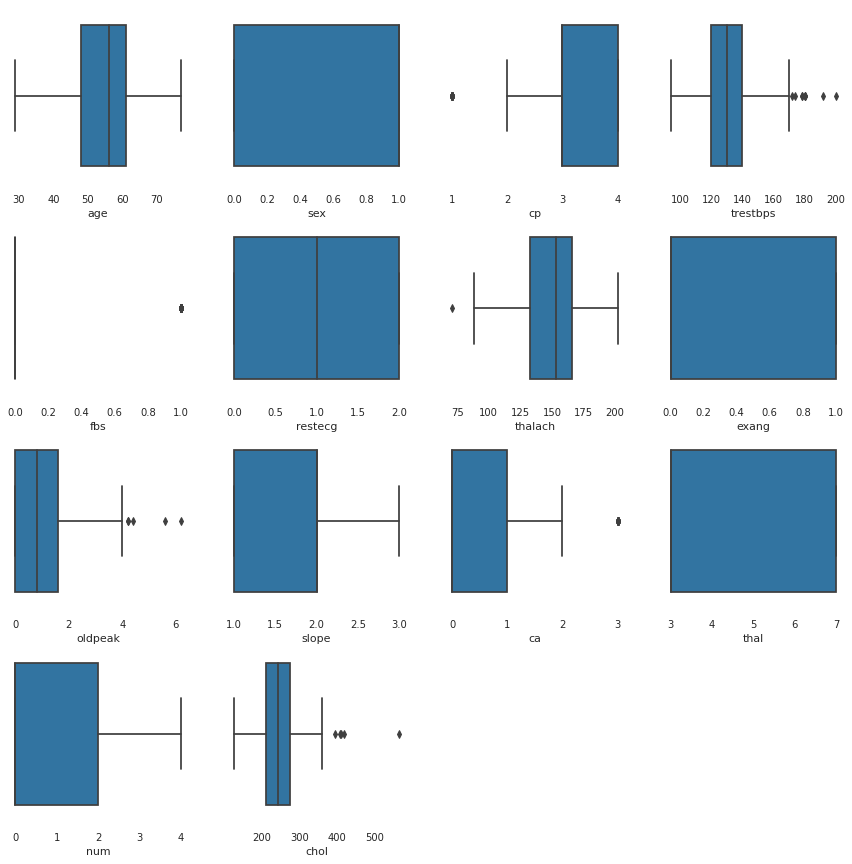

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Trực quan hóa dữ liệu cho từng biến liên tục
plt.figure(figsize = (15, 15))
plt.subplot(4, 4, 1)
sns.boxplot(df2.age, orient='v')
plt.subplot(4, 4, 2,)
sns.boxplot(df2.sex, orient='v')
plt.subplot(4, 4, 3,)
sns.boxplot(df2.cp, orient='v')
plt.subplot(4, 4, 4,)
sns.boxplot(df2.trestbps, orient='v')
plt.subplot(4, 4, 5,)
sns.boxplot(df2.fbs, orient='v')
plt.subplot(4, 4, 6,)
sns.boxplot(df2.restecg, orient='v')
plt.subplot(4, 4, 7,)
sns.boxplot(df2.thalach, orient='v')
plt.subplot(4, 4, 8,)
sns.boxplot(df2.exang, orient='v')
plt.subplot(4, 4, 9,)
sns.boxplot(df2.oldpeak, orient='v')
plt.subplot(4, 4, 10,)
sns.boxplot(df2.slope, orient='v')
plt.subplot(4, 4, 11,)
sns.boxplot(df2.ca, orient='v')
plt.subplot(4, 4, 12,)
sns.boxplot(df2.thal, orient='v')
plt.subplot(4, 4, 13,)
sns.boxplot(df2.num, orient='v')
plt.subplot(4, 4, 14,)
sns.boxplot(df2.chol, orient='v')
plt.show()

In [55]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [59]:
model =  RobustScaler()
array_transformed = model.fit_transform(X)

In [60]:
df_tranformed = pd.DataFrame(array_transformed, columns=X.columns)
df_tranformed

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.538462,0.0,-2.0,0.75,1.0,0.5,-0.090909,0.0,0.9375,1.0,0.0,0.75,0.0
1,0.846154,0.0,1.0,1.50,0.0,0.5,-1.363636,1.0,0.4375,0.0,3.0,0.00,1.0
2,0.846154,0.0,1.0,-0.50,0.0,0.5,-0.727273,1.0,1.1250,0.0,2.0,1.00,0.5
3,-1.461538,0.0,0.0,0.00,0.0,-0.5,1.030303,0.0,1.6875,1.0,0.0,0.00,0.0
4,-1.153846,-1.0,-1.0,0.00,0.0,0.5,0.575758,0.0,0.3750,-1.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0.076923,-1.0,1.0,0.50,0.0,-0.5,-0.909091,1.0,-0.3750,0.0,0.0,1.00,0.5
293,-0.846154,0.0,-2.0,-1.00,0.0,-0.5,-0.636364,0.0,0.2500,0.0,0.0,1.00,0.5
294,0.923077,0.0,1.0,0.70,1.0,-0.5,-0.363636,0.0,1.6250,0.0,2.0,1.00,1.0
295,0.076923,0.0,1.0,0.00,0.0,-0.5,-1.151515,1.0,0.2500,0.0,1.0,1.00,1.5


In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import datetime
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,AdaBoostRegressor

y = df2['chol']
X = df_tranformed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

models = [
    SVR(kernel='rbf', C=100, gamma=0.1),
    LinearRegression(),
    RandomForestRegressor(n_estimators=100),
    DecisionTreeRegressor(),
    KNeighborsRegressor(n_neighbors=5),
    AdaBoostRegressor(n_estimators=100, base_estimator=RandomForestRegressor(), learning_rate=1),
]
CV = 1
entries = []
i=0
for model in models:
    scores_train = []
    scores_test = []
    times = []
    abs_scores = []
    for j in range(CV):
        t1 = datetime.datetime.now()
        model_name = model.__class__.__name__
        model.fit(X_train,y_train)
        t2 = datetime.datetime.now()    
        d = round((t2 - t1).microseconds/1000,1) # => miliseconds
        score_train = model.score(X_train,y_train)
        score_test = model.score(X_test,y_test)
        abs_score = abs(score_train - score_test)          
        
        scores_train.append(score_train)          
        scores_test.append(score_test)
        abs_scores.append(abs_score)
        times.append(d) 
    entries.append([model_name, np.array(scores_train).mean(), 
                    np.array(scores_test).mean(), np.array(abs_scores).mean(), 
                    np.array(times).mean()])
    i += 1
cv_df = pd.DataFrame(entries, 
                     columns=['model_name', 'score_train_mean', 
                              'score_test_mean', 'abs|score|', 'time_mean'])
cv_df

,model_name,score_train_mean,score_test_mean,abs|score|,time_mean
0,SVR,0.436092,-0.037896,0.473988,8.1
1,LinearRegression,0.122525,0.090863,0.031662,1.4
2,RandomForestRegressor,0.855472,0.042984,0.812488,186.3
3,DecisionTreeRegressor,1.000000,-0.510773,1.510773,2.0
4,KNeighborsRegressor,0.254267,-0.071738,0.326005,1.0
5,AdaBoostRegressor,0.911434,0.022995,0.888438,602.9


In [ ]:
### Nhận xét:
## Sau khi transform vẫn không khá hơn

In [64]:
from sklearn.feature_selection import SelectKBest, f_regression

bestFeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestFeatures.fit(df, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df.columns)

In [70]:
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
featureScores.sort_values("Score", ascending = False, inplace = True)
print(featureScores)
df = df[['age', 'sex', 'restecg', 'trestbps', 'ca']]

       Specs      Score
0        age  12.632757
1        sex  12.048355
5    restecg   8.260885
3   trestbps   5.193847
10        ca   4.019767
2         cp   1.541042
12       num   1.308307
7      exang   1.042398
8    oldpeak   0.440098
4        fbs   0.047650
11      thal   0.034790
9      slope   0.025054
6    thalach   0.000002


In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import datetime
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,AdaBoostRegressor

y = df2['chol']
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

models = [
    SVR(kernel='rbf', C=100, gamma=0.1),
    LinearRegression(),
    RandomForestRegressor(n_estimators=100),
    DecisionTreeRegressor(),
    KNeighborsRegressor(n_neighbors=5),
    AdaBoostRegressor(n_estimators=100, base_estimator=RandomForestRegressor(), learning_rate=1),
]
CV = 1
entries = []
i=0
for model in models:
    scores_train = []
    scores_test = []
    times = []
    abs_scores = []
    for j in range(CV):
        t1 = datetime.datetime.now()
        model_name = model.__class__.__name__
        model.fit(X_train,y_train)
        t2 = datetime.datetime.now()    
        d = round((t2 - t1).microseconds/1000,1) # => miliseconds
        score_train = model.score(X_train,y_train)
        score_test = model.score(X_test,y_test)
        abs_score = abs(score_train - score_test)          
        
        scores_train.append(score_train)          
        scores_test.append(score_test)
        abs_scores.append(abs_score)
        times.append(d) 
    entries.append([model_name, np.array(scores_train).mean(), 
                    np.array(scores_test).mean(), np.array(abs_scores).mean(), 
                    np.array(times).mean()])
    i += 1
cv_df = pd.DataFrame(entries, 
                     columns=['model_name', 'score_train_mean', 
                              'score_test_mean', 'abs|score|', 'time_mean'])
cv_df

,model_name,score_train_mean,score_test_mean,abs|score|,time_mean
0,SVR,0.169327,0.016626,0.152701,9.1
1,LinearRegression,0.115202,0.047233,0.067969,1.8
2,RandomForestRegressor,0.820645,-0.123867,0.944513,145.4
3,DecisionTreeRegressor,0.990344,-0.440654,1.430998,1.4
4,KNeighborsRegressor,0.292344,-0.053992,0.346335,1.6
5,AdaBoostRegressor,0.788927,-0.094669,0.883595,102.5
